In [1]:
# Setup data directories
train_dir = "Chest_X_ray/train/"
test_dir = "Chest_X_ray/test/"

In [3]:
import tensorflow as tf
BATCH_SIZE=1
IMG_SHAPE=(224,224)



train_datagen_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                      image_size=IMG_SHAPE,
                                                                      batch_size=BATCH_SIZE,
                                                                      label_mode="categorical")

test_datagen=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                      image_size=IMG_SHAPE,
                                                                      batch_size=BATCH_SIZE,
                                                                      label_mode="categorical")


Found 5144 files belonging to 3 classes.
Found 1288 files belonging to 3 classes.


In [4]:
class_names=train_datagen_full.class_names

In [5]:
class_names

['COVID19', 'NORMAL', 'PNEUMONIA']

In [6]:
len(class_names)

3

In [7]:
#https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/video_notebooks/06_transfer_learning_in_tensorflow_part_3_scaling_up_video.ipynb
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
#MobileNetV3 models expect their inputs to be float tensors of pixels with values in the [0-255] range. 
#so we dont need rescaling aka normalisation

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV3Large(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False) # makes sure layers which should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(len(class_names),activation="softmax")(x)
model = tf.keras.Model(inputs, outputs) 

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3large (Functiona  (None, None, None, 960)  2996352   
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 960)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 2883      
                                                                 
Total params: 2,999,235
Trainable params: 2,883
Non-trainable params: 2,996,352
_________________________________________________________________


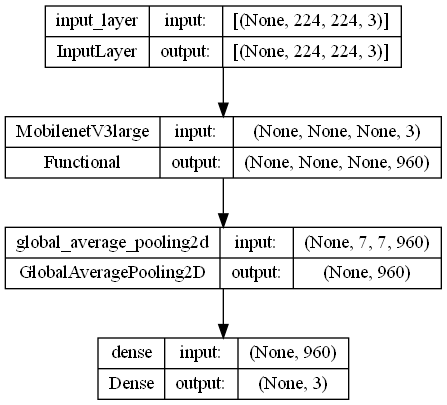

In [10]:
tf.keras.utils.plot_model(model, to_file="chest_x_ray_model.png", show_shapes=True)

In [11]:
# Set the seed
tf.random.set_seed(42)
history_10_epochs_3_classes = model.fit(train_datagen_full,
                    epochs=10,
                    steps_per_epoch=len(train_datagen_full),
                    validation_data=test_datagen,
                    validation_steps=len(test_datagen),
                    )

Epoch 1/10
5144/5144 [==============================] - 131s 25ms/step - loss: 0.2004 - accuracy: 0.9285 - val_loss: 0.1119 - val_accuracy: 0.9573
Epoch 2/10
5144/5144 [==============================] - 99s 19ms/step - loss: 0.1246 - accuracy: 0.9570 - val_loss: 0.1063 - val_accuracy: 0.9596
Epoch 3/10
5144/5144 [==============================] - 97s 19ms/step - loss: 0.1041 - accuracy: 0.9664 - val_loss: 0.1038 - val_accuracy: 0.9658
Epoch 4/10
5144/5144 [==============================] - 99s 19ms/step - loss: 0.0849 - accuracy: 0.9718 - val_loss: 0.1164 - val_accuracy: 0.9627
Epoch 5/10
5144/5144 [==============================] - 98s 19ms/step - loss: 0.0818 - accuracy: 0.9728 - val_loss: 0.1239 - val_accuracy: 0.9635
Epoch 6/10
5144/5144 [==============================] - 93s 18ms/step - loss: 0.0762 - accuracy: 0.9759 - val_loss: 0.1229 - val_accuracy: 0.9612
Epoch 7/10
5144/5144 [==============================] - 88s 17ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.1189 

In [12]:
model.evaluate(test_datagen)

1288/1288 [==============================] - 19s 15ms/step - loss: 0.1339 - accuracy: 0.9643


[0.13386207818984985, 0.9642857313156128]

In [13]:
model.save("chest_x_ray_model")

INFO:tensorflow:Assets written to: chest_x_ray_model\assets


INFO:tensorflow:Assets written to: chest_x_ray_model\assets


In [14]:
class_names

['COVID19', 'NORMAL', 'PNEUMONIA']

In [15]:
history=history_10_epochs_3_classes

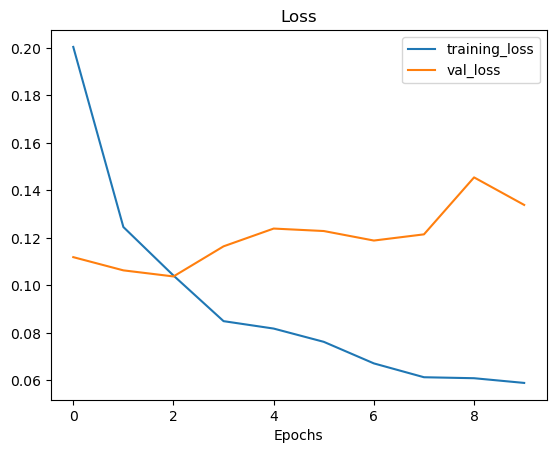

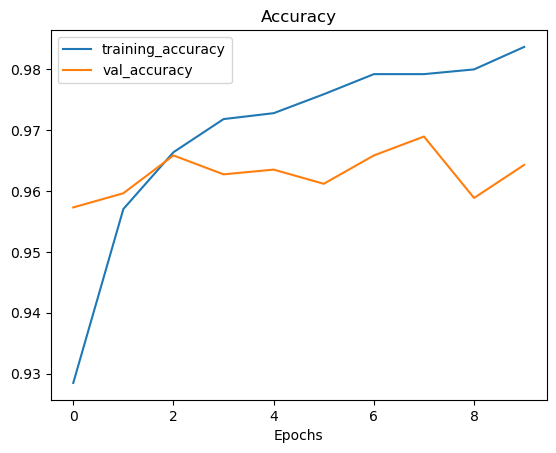

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();